In [1]:
import pandas as pd

In [3]:
df1 = pd.read_csv("04_store_member.csv")

In [5]:
df2 = pd.read_csv("04_store_product_1.csv")

In [7]:
df1.columns.intersection(df2.columns)

Index(['회원번호'], dtype='object')

In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130893 entries, 0 to 130892
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   공급일자      130893 non-null  int64  
 1   물품코드      130893 non-null  int64  
 2   물품대분류     130893 non-null  object 
 3   물품중분류     130889 non-null  object 
 4   물품소분류     130890 non-null  object 
 5   물품명       130891 non-null  object 
 6   구매수량      130893 non-null  float64
 7   구매금액      130893 non-null  int64  
 8   구매매장      130891 non-null  object 
 9   반품_원거래일자  1940 non-null    float64
 10  회원번호      130893 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 11.0+ MB


In [12]:
# 구매 물품 데이터
df2.head(2)

,공급일자,물품코드,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,반품_원거래일자,회원번호
0,20170201,50301001,채소,과일채소,딸기,딸기(1kg),1.0,13600,매장1,NaN,2102
1,20170201,80201053,간식,떡,가래떡,현미가래떡(400g),1.0,99999999,매장1,NaN,2102


In [19]:
df3 = df2.pivot_table(index="회원번호",
                values=["구매수량", "구매금액"],
                aggfunc="sum").reset_index()

In [24]:
# 1383
df3

,회원번호,구매금액,구매수량
0,2102,102093159,472.5
1,2103,7904400,1586.4
2,2104,389040,112.0
3,2105,3067930,602.0
4,2106,54550,25.0
...,...,...,...
1378,6471,1600,1.0
1379,6474,709400,175.0
1380,6478,2600,1.0
1381,6489,22100,14.0


In [22]:
# 4396
df1

,회원번호,회원상태,성별,결혼유무,주소,생년
0,2101,정상회원,여,기혼,서울 강북구 미아동 134-,1967.0
1,2102,정상회원,여,NaN,경기 용인시 수지구 동천동,1947.0
2,2103,정상회원,여,기혼,경기 용인시 수지구 동천동,1972.0
3,2104,정상회원,여,NaN,경기 용인시 수지구 성복동,1969.0
4,2105,정상회원,여,기혼,경기 용인시 수지구 동천동,1948.0
...,...,...,...,...,...,...
4391,6492,정상회원,여,미혼,경기 성남시 분당구 판교동,1963.0
4392,6493,정상회원,여,기혼,서울 관악구 행운동 1681,1982.0
4393,6494,정상회원,남,기혼,경기 성남시 분당구 백현동,1975.0
4394,6495,정상회원,여,기혼,서울 용산구 한남동 737-,1961.0


In [23]:
df1.columns.intersection(df3.columns)

Index(['회원번호'], dtype='object')

In [28]:
# 1383?
pd.merge(df1, df3, on="회원번호", how="inner").shape

(1383, 8)

In [29]:
# 4396?
pd.merge(df1, df3, on="회원번호", how="outer").shape

(4396, 8)

In [33]:
# 4396, null 값 4396 - 1383개 at 구매금액 and 구매수량?
print(4396 - 1383)
pd.merge(df1, df3, on="회원번호", how="left").isnull().sum()

3013


회원번호       0
회원상태       1
성별         3
결혼유무     947
주소         0
생년         3
구매금액    3013
구매수량    3013
dtype: int64

In [35]:
# 1383, 구매금액 and 구매수량 null 값 0개?
print(df3.shape)
pd.merge(df1, df3, on="회원번호", how="right").isnull().sum()

(1383, 3)


회원번호      0
회원상태      0
성별        1
결혼유무    288
주소        0
생년        2
구매금액      0
구매수량      0
dtype: int64

In [ ]:
# 중복이 있으면 붙고, 없으면 안붙고
# pivot_table 하지 않고 바로 merge했을 때의 문제점
# : 성별, 연령 계산했을 때 중복되는 값이 나온다. 
# 한 품목 이상 구매한 고객이 있으므로.

# 세 가지 병합 방법 중, 가장 합리적인 방법은
# inner join이다. 그리고 inner join으로 붙인 table을
# 갖고 분석을 진행해줄 수 있다.

# 이와 같이, 상황과 데이터 구조, 데이터 타입에 맞는
# 적절한 데이터 병합 방법을 우리가 찾아서 사용해야 한다.

# 그냥 붙이면 중복되거나, 누락되는 일이 발생할 수 있다.

# pivot_table로 처리하고 붙일지,
# 바로 붙일지는 데이터를 확인해보면서
# 판단해야 한다.

In [37]:
df4 = pd.merge(df1, df3, on="회원번호", how="inner")

In [40]:
# 생년을 이용한 고객의 연령 계산: 현재 연도 - 고객의 생년
df4["연령"] = 2021 - df4["생년"]

In [43]:
# 고객의 인적 특성을 바탕으로 구매 특성을 분석해보자.
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc("font", family="Malgun Gothic") # Window 용

In [46]:
# 성별에 따른 구매수량과, 구매금액의 합
# 인원 수에 따른 구매력의 차이인지 알아보기: 여성 > 남성 (10배 차이)
df4["성별"].value_counts()

여    1270
남     112
Name: 성별, dtype: int64

In [47]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1383 entries, 0 to 1382
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   회원번호    1383 non-null   int64  
 1   회원상태    1383 non-null   object 
 2   성별      1382 non-null   object 
 3   결혼유무    1095 non-null   object 
 4   주소      1383 non-null   object 
 5   생년      1381 non-null   float64
 6   구매금액    1383 non-null   int64  
 7   구매수량    1383 non-null   float64
 8   연령      1381 non-null   float64
dtypes: float64(3), int64(2), object(4)
memory usage: 108.0+ KB


In [49]:
# 일단 pivot으로 계산해보기
# 인원 수가 10배 차이난다.
# 그로 인해 구매 금액, 구매수량 차이도 크다.
df4.pivot_table(index="성별", values=["구매금액", "구매수량"], aggfunc="sum")

,구매금액,구매수량
성별,,
남,36626115,7401.65
여,809091939,144515.65


<Axes: xlabel='성별', ylabel='구매금액'>

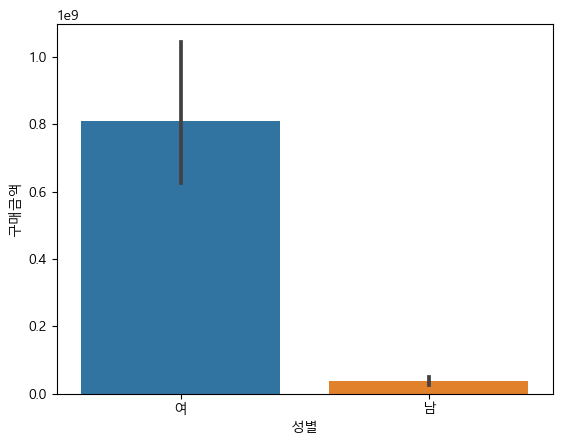

In [50]:
# 평균이 계산 된다. 
# 긴 막대기: confidence interval
# 이 data가 모집단에서 추출되었을 때,
# 모집단의 평균, 모평균이 있을 확률이 95%인 구간을
# 막대기로 표시해준 것이다.
sns.barplot(data=df4, x="성별", y="구매금액")

<Axes: xlabel='성별', ylabel='구매금액'>

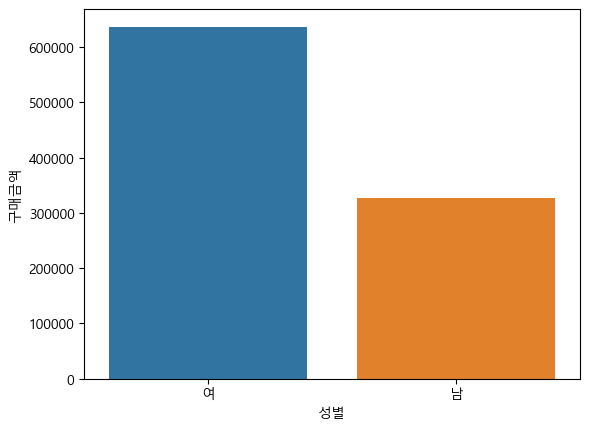

In [53]:
# errorbar = None : ci(confidence interval)신뢰구간 끄기
#  고객 당 구매 금액의 평균 계산
sns.barplot(data=df4, x="성별", y="구매금액", errorbar=None)

<Axes: xlabel='성별', ylabel='구매금액'>

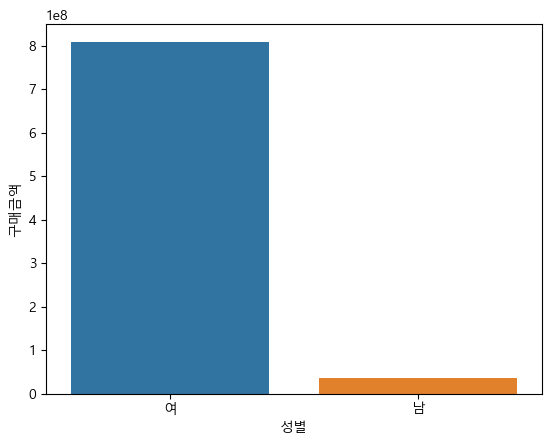

In [55]:
# 합 계산 : 인적특성(성별)과 구매 트렌드와의 관계
# estimator="sum": sum을 구하기
# 여성이 장을 보는 경우가 더 흔하기 때문에 당연한 결과(구매 금액 평균, 합 모두 여성이 더 높다.).
sns.barplot(data=df4, x="성별", y="구매금액", estimator="sum", errorbar=None)

In [63]:
#연령에 따른 구매금액, 구매수량 비교
pd.options.display.float_format = "{:.2f}".format
df4["연령"].describe()

count      1381.00
mean        -87.85
std        5327.94
min     -197916.00
25%          43.00
50%          50.00
75%          59.00
max        1828.00
Name: 연령, dtype: float64

In [67]:
cond1 = (df4["연령"] > 1) & (df4["연령"] < 100)
df4.loc[cond1][["연령"]].describe()

,연령
count,1375.00
mean,51.57
std,11.19
min,28.00
25%,43.00
50%,50.00
75%,59.00
max,94.00


<Axes: xlabel='연령', ylabel='구매수량'>

C:\Users\USER\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
C:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


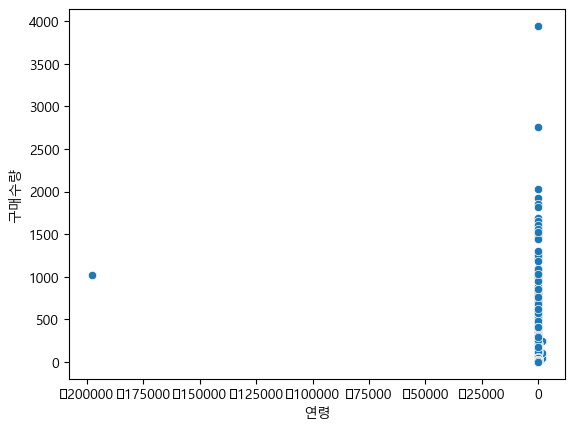

In [68]:
# sns.scatterplot: 숫자 데이터끼리 비교하는 시각화 기법
sns.scatterplot(data=df4, x="연령", y="구매수량")
# 연령에 음의 값이 있다: 이상치
# 이 이상치 때문에 데이터가 한쪽으로 쏠려있는 것처럼 보인다.

<Axes: xlabel='연령', ylabel='구매수량'>

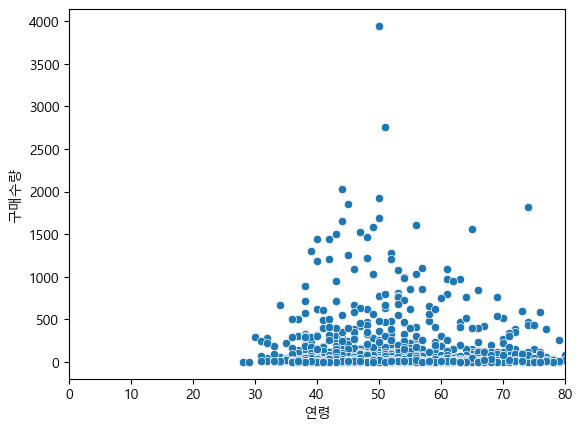

In [69]:
#plt.xlim : x의 limit
plt.xlim([0, 80]) # 0부터 80세까지만 보겠다.
sns.scatterplot(data=df4, x="연령", y="구매수량")

<Axes: xlabel='연령', ylabel='구매수량'>

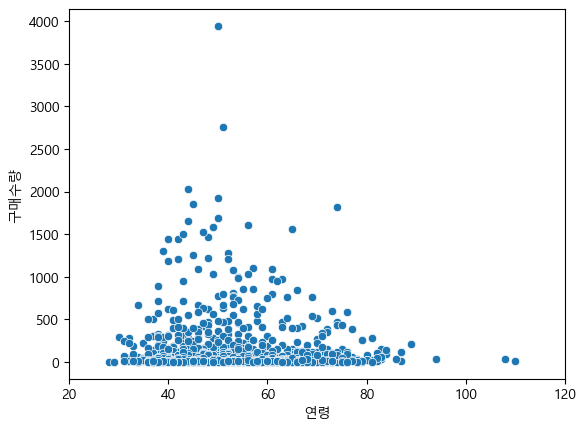

In [72]:
# 위 그림을 보니, 25세 이상부터이고
# 80세 이상도 있는 것처럼 보인다.
# plt.xlim을 조정해보자.
plt.xlim([20, 120])
sns.scatterplot(data=df4, x="연령", y="구매수량")
# 이제 연령-구매수량 간의 관계를 볼 수 있다.
# 연령에 따라 구매수량이 증가하느냐?와 같은
# 특별한 추이는 없어보인다.

# 얼추 봤을 때,
# 40-50대 고객들 구매력이 좀 높구나까지 확인해볼 수 있다.

<Axes: xlabel='연령', ylabel='구매수량'>

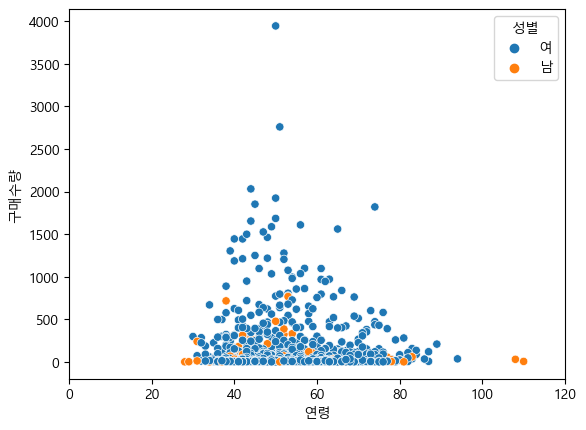

In [74]:
# 이거를 성별에 따라 나눠서 볼 수도 있다.
plt.xlim([0, 120])
sns.scatterplot(data=df4, x="연령", y="구매수량", hue="성별")

In [ ]:
# 이런 식으로 데이터를 병합하고
# 데이터를 시각화해서 분석작업까지
# 아주 간단하게 해봤따.

# 파생변수를 만드는 스킬,
# 통계적 가설 검정,
# 여러가지 전처리 기법, 분석 스킬을
# 좀 더 가미하면
# 더 다이나믹한 분석을 해볼 수 있다.